In [5]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt

In [6]:
ticker_symbol = "AAPL"
start_date = "2013-03-15"
end_date = "2023-03-15"

# Download the stock data
ticker_info = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Bearish Days

In [7]:
ticker_info['Bearish_Days'] = ticker_info.apply(lambda x: 1 if x['Open'] > x['Close'] 
                      else 0, axis=1)

Bullish Days

In [8]:
ticker_info['Bullish_Days'] = ticker_info.apply(lambda x: 1 if x['Open'] < x['Close'] 
                      else 0, axis=1)

Sideway Trading - open=close price

In [9]:
ticker_info['Close=Open'] = ticker_info.apply(lambda x: 1 if x['Open'] == x['Close'] 
                      else 0, axis=1)

High becomes close

In [11]:
ticker_info['Close=High'] = ticker_info.apply(lambda x: 1 if x['High'] == x['Close'] 
                      else 0, axis=1)

Low becomes close

In [12]:
ticker_info['Close=Low'] = ticker_info.apply(lambda x: 1 if x['Low'] == x['Close'] 
                      else 0, axis=1)

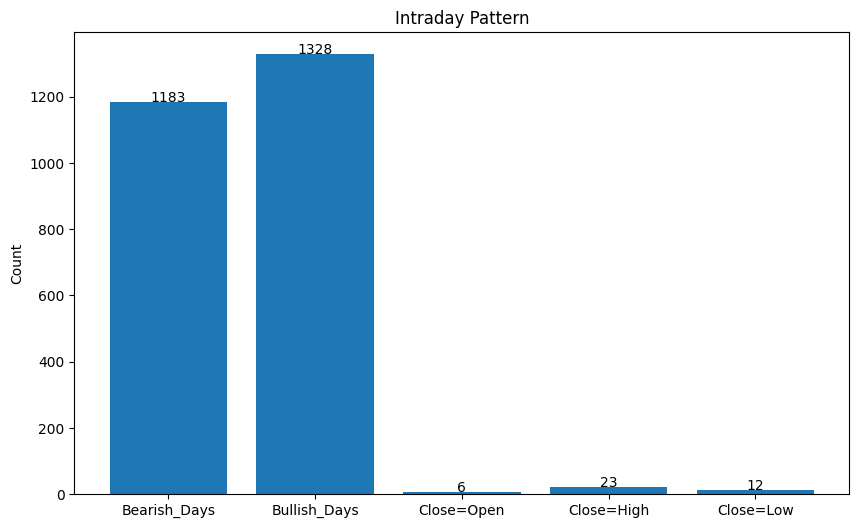

In [14]:
counts = ticker_info[['Bearish_Days', 'Bullish_Days', 'Close=Open', 'Close=High', 'Close=Low']].sum()


# Create a bar chart for all 5 columns
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(counts.index, counts.values)

# Add the sum on top of each column
for i, v in enumerate(counts.values):
    ax.text(i, v+0.2, str(v), ha='center')

# Add titles and labels
ax.set_title('Intraday Pattern')
ax.set_ylabel('Count')

# Show the chart
plt.show()

Range between Open and Close

In [18]:
ticker_info["Close_Open_Difference"] = ticker_info["Close"] - ticker_info["Open"]

Minimum and Maximum range

In [19]:
ticker_info[ticker_info["Close_Open_Difference"] == ticker_info["Close_Open_Difference"].min()]

,Open,High,Low,Close,Adj Close,Volume,Bearish_Days,Bullish_Days,Close=Open,Close=High,Close=Low,Close_Open_Difference
Date,,,,,,,,,,,,
2022-05-05,163.850006,164.080002,154.949997,156.770004,155.826065,130525300,1,0,0,0,0,-7.080002


In [20]:
ticker_info[ticker_info["Close_Open_Difference"] == ticker_info["Close_Open_Difference"].max()]

,Open,High,Low,Close,Adj Close,Volume,Bearish_Days,Bullish_Days,Close=Open,Close=High,Close=Low,Close_Open_Difference
Date,,,,,,,,,,,,
2022-02-24,152.580002,162.850006,152.0,162.740005,161.760101,141147500,0,1,0,0,0,10.160004


Range between high and low prices

In [21]:
ticker_info['Range_Low_High'] = ticker_info['High'] - ticker_info['Low']

In [22]:
ticker_info.describe()

,Open,High,Low,Close,Adj Close,Volume,Bearish_Days,Bullish_Days,Close=Open,Close=High,Close=Low,Close_Open_Difference,Range_Low_High
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,64.879118,65.620463,64.170869,64.924464,63.095614,1.619624e+08,0.470004,0.527612,0.002384,0.009138,0.004768,0.045347,1.449595
std,49.545842,50.205723,48.914208,49.587232,50.089618,1.101197e+08,0.499199,0.499336,0.048776,0.095173,0.068897,1.323314,1.613454
min,13.856071,14.271429,13.753571,13.947500,12.046195,3.519590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-7.080002,0.115000
25%,27.500000,27.772499,27.200001,27.452499,25.184237,8.963800e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-0.273930,0.384287
50%,42.750000,43.119999,42.407501,42.762501,40.818825,1.270508e+08,0.000000,1.000000,0.000000,0.000000,0.000000,0.030001,0.705000
75%,114.550003,116.000000,112.680000,114.907501,113.176132,1.970856e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.360001,2.029999
max,182.630005,182.940002,179.119995,182.009995,180.683868,1.065523e+09,1.000000,1.000000,1.000000,1.000000,1.000000,10.160004,12.809998


Text(0.5, 0, 'Low-High Price Range')

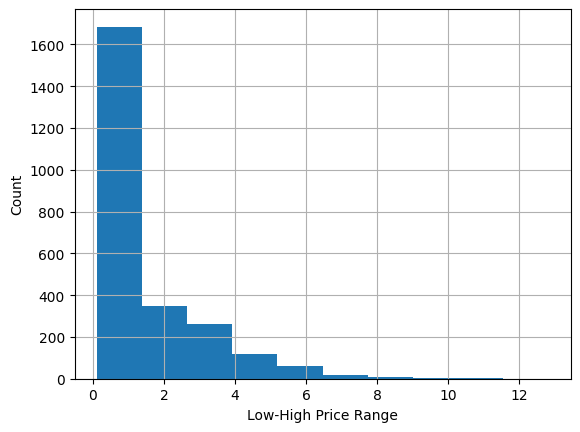

In [23]:
ticker_info['Range_Low_High'].hist()
plt.ylabel('Count')
plt.xlabel('Low-High Price Range')

Text(0.5, 1.0, 'Low High Price Range Variability')

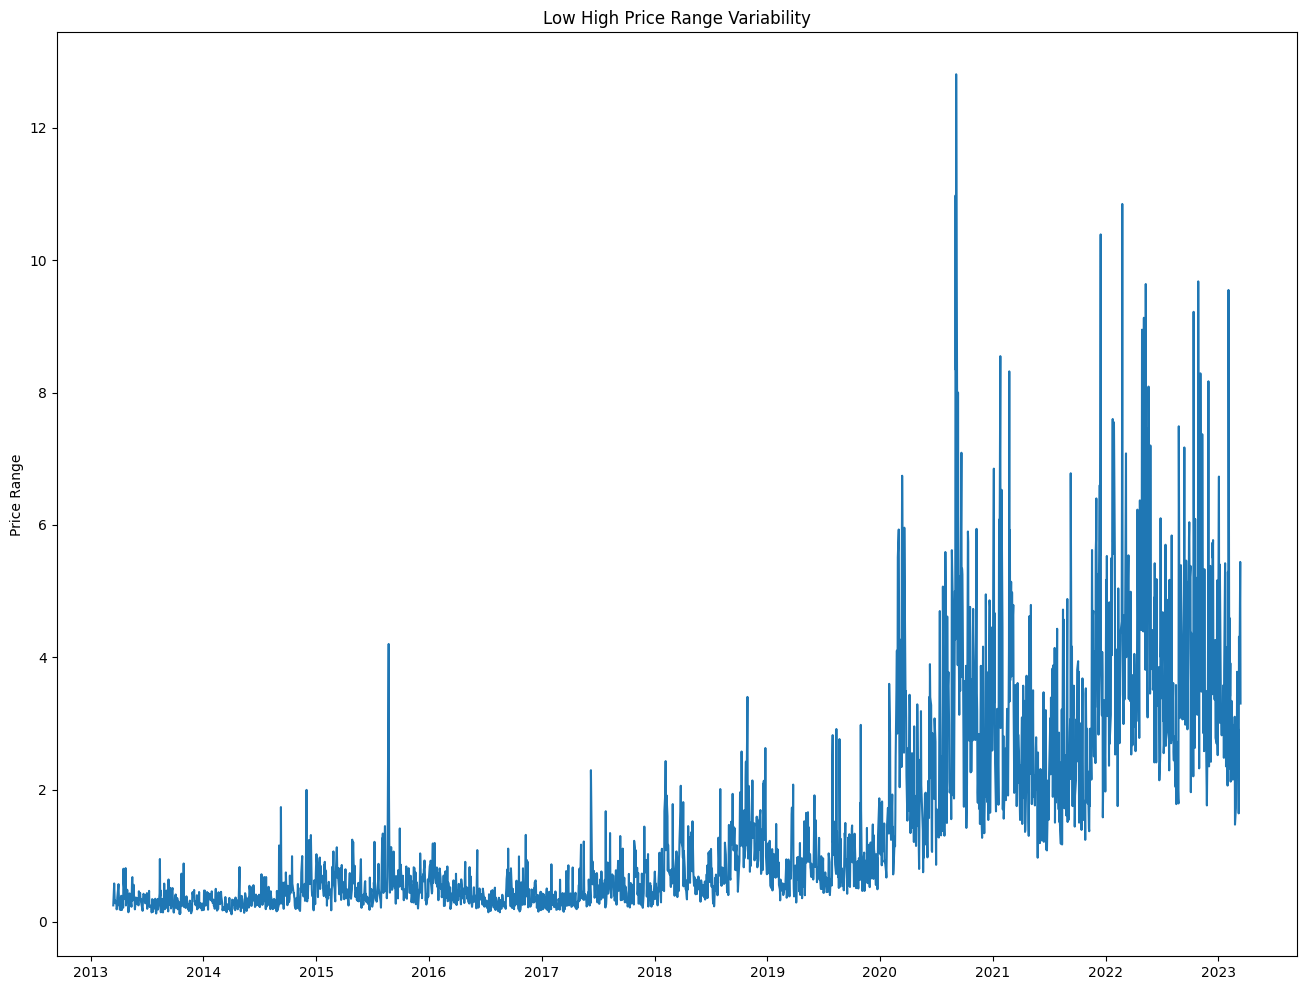

In [24]:
plt.figure(figsize=(16, 12))
plt.plot(ticker_info.index, ticker_info['Range_Low_High'])
plt.ylabel('Price Range')
plt.title('Low High Price Range Variability')

The low-high swings are more visible on the chart. The highest swing took place in 2020, right at the start of the pandemic.

How many times the open was lower/higher than previous day close?

In [25]:
prev_close = ticker_info["Close"].shift(1)
open_previous_close = ticker_info["Open"] - prev_close

ticker_info['Higher_Close'] = [1 if x > 0 else 0 for x in open_previous_close]

Text(0.5, 1.0, 'Gaps at Open Variability')

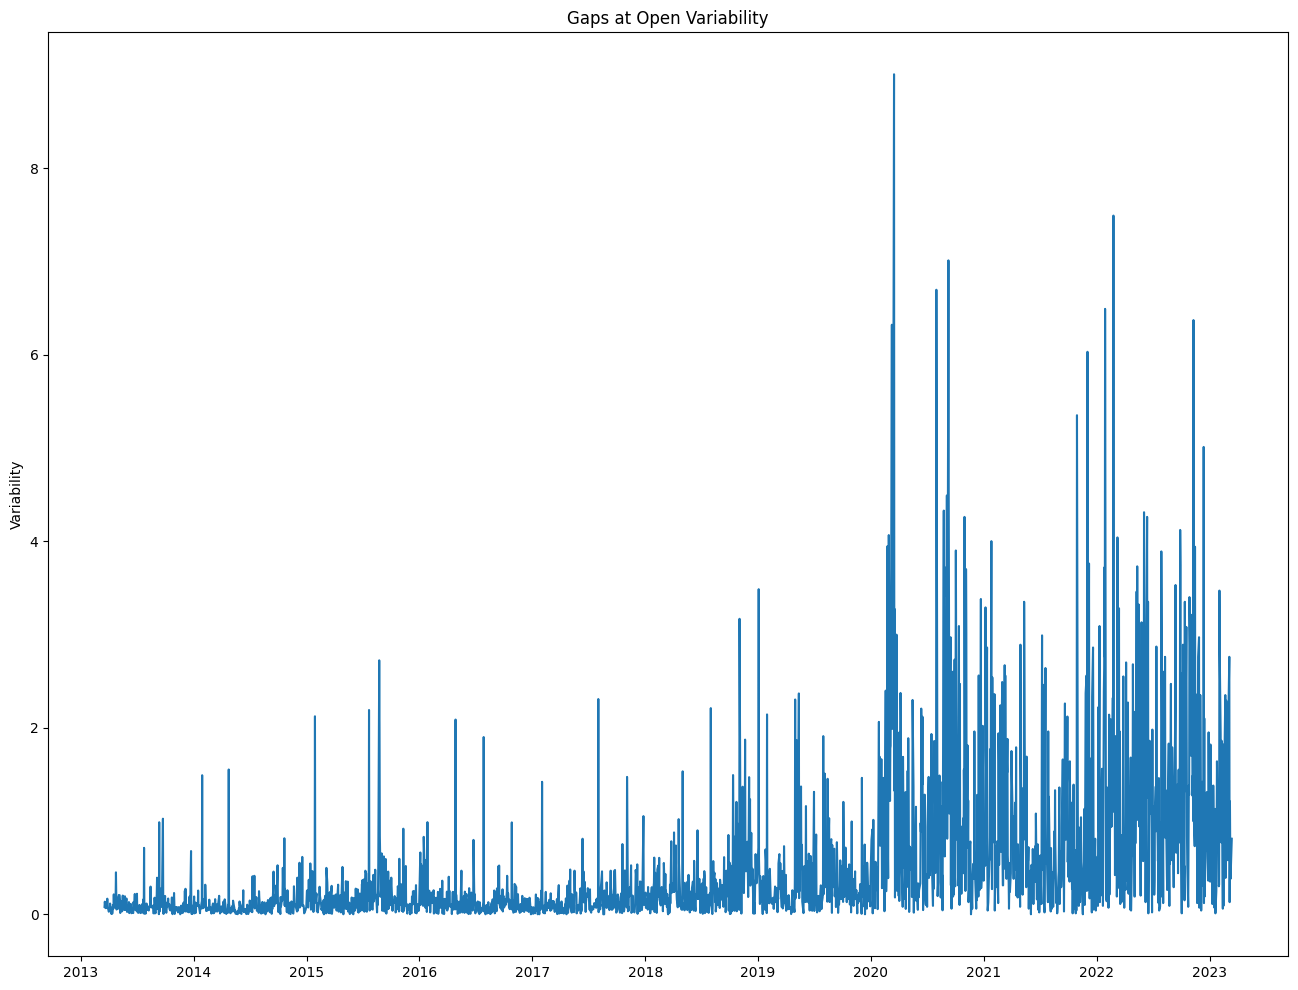

In [31]:
ticker_info['prev_close'] = prev_close
ticker_info['Gaps_at_Open'] = abs(ticker_info['Open'] - ticker_info['prev_close'])
ticker_info['Gaps_at_Open'].describe()

plt.figure(figsize=(16, 12))
plt.plot(ticker_info.index, ticker_info['Gaps_at_Open'])
plt.ylabel('Variability')
plt.title('Gaps at Open Variability')

In [32]:
ticker_info['EMA50'] = ta.trend.ema_indicator(ticker_info["Close"], window=50)

ticker_info['EMA200'] = ta.trend.ema_indicator(ticker_info["Close"], window=200)

In [33]:
ticker_info['50_200_Crossover'] = ticker_info.apply(lambda x: 1 if x['EMA50'] > x['EMA200'] 
                      else 0, axis=1)

When the 50-day EMA falls below the 200-day EMA, it indicates a death cross, which is commonly seen as a sign of the conclusion of a bullish trend by technical analysts. Conversely, when the 50-day EMA rises above the 200-day EMA, it creates a golden cross, which is believed to have a comparable power in indicating the beginning of a new bullish trend.

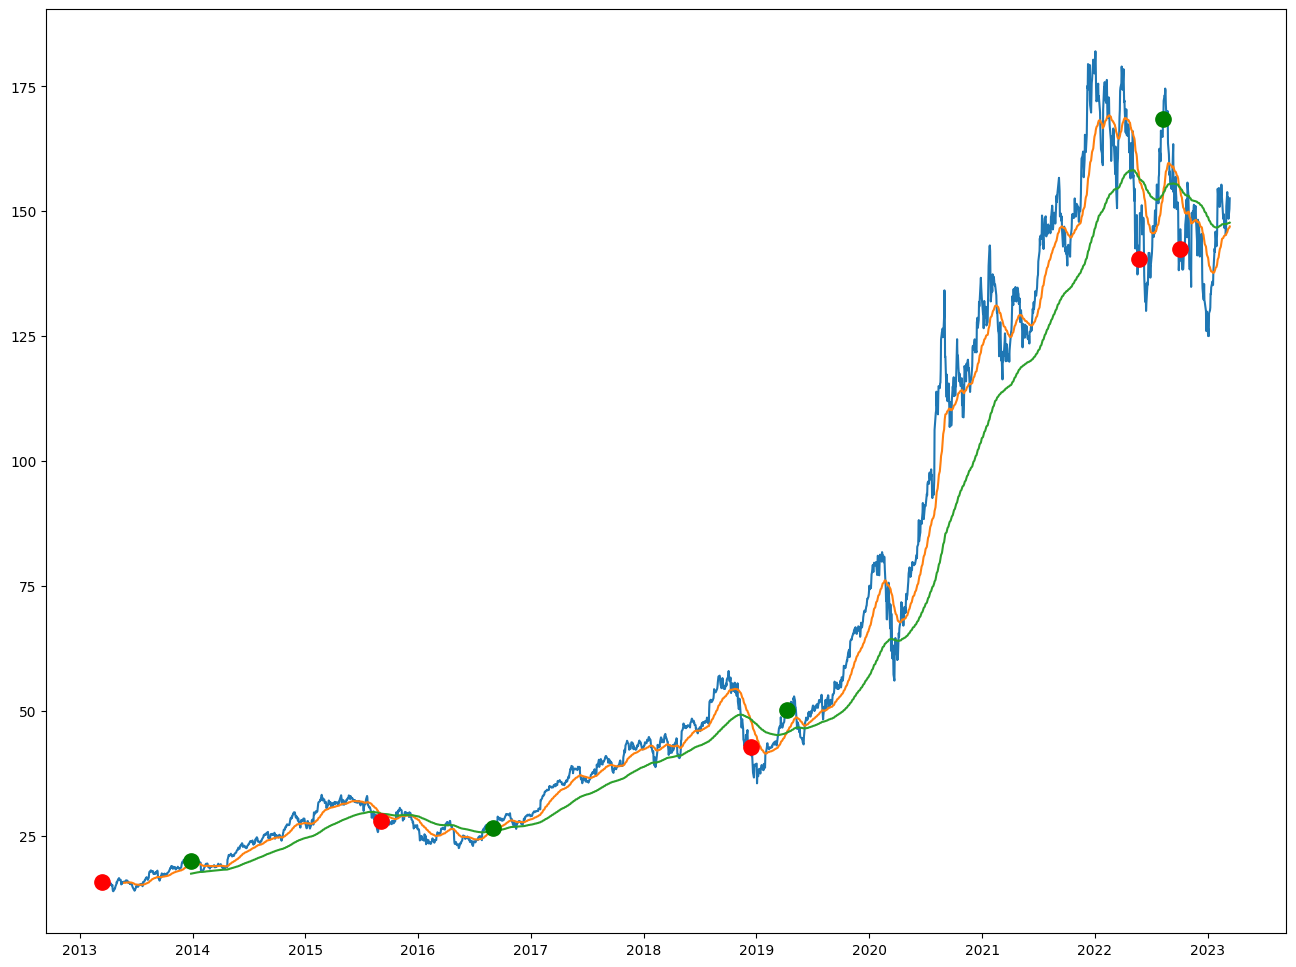

In [34]:
plt.figure(figsize=(16, 12))

plt.plot(ticker_info.index, ticker_info[['Close', 'EMA50', 'EMA200']])

prev_signal = None
for index, row in ticker_info.iterrows():
    signal = row.at['50_200_Crossover']
    if signal != prev_signal:
        if signal == 1:
            plt.plot(index, row['Close'], marker='o', markersize=11, color='green')
        elif signal == 0:
            plt.plot(index, row['Close'], marker='o', markersize=11, color='red')
        prev_signal = signal